In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
from functools import partial

import matplotlib.pyplot as plt

# Estimación frequentista de parametros

Estoy siguiendo este curso para aprender acerca de inferencia estadistica, Este video toca el tema desde un punto de vista frecuentista.

- https://www.youtube.com/watch?v=4UJc0S8APm4

Dado un parametro $\theta$ y se produce una variable aleatoria, para la cual nuestro estimador genera otra variable aleatoria $\Theta$ que es nuestro valor estimado. El estimador funciona tanto como con valores escalares como con vectores.

<img  src="images/estimator.png"/>

El objetivo es construir un estimador con error ($\Theta$ - $\theta$) tan pequeno como sea posible.


<img  src="images/estimator-caracteristics.png"/>

Un buen estimador cumple con las siguientes caracteristicas, el valor de $\theta$ es desconocido, 

- No tiene sesgos: El valor esperado del estimador $E[\Theta]$ se acerca a $\theta$
- Es consistente: $\Theta_n$ --> $\theta$ 
- Tiene un mean square error pequeno: 



El describe 2 metodos para construir un estimador de un parametro:

- Maximun likehood
- Sample distribution (CLT theorem)

In [4]:
def check_bias(distribution_generator, estimator, N=1000):
    results = []
    for i in range(N):
        results.append(estimator(distribution_generator()))
    return np.mean(results)

def compute_samples_table(distribution_generator, estimator):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        X = distribution_generator(i)
        mu = estimator(X)
        df = pd.DataFrame({'values': X})
        df.loc[:, "estimate"] = mu
        df.loc[:, "sample"] = i
        results.append(df)
    return pd.concat(results)

def estimators_samples_fixed_N(distribution_generator, estimator, N):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        estimators = []
        for j in range(i):
            mu = estimator(distribution_generator(N))
            estimators.append(mu)
        df = pd.DataFrame({'values': estimators})
        df.loc[:, "sample"] = i
        results.append(df)
    return pd.concat(results)

def estimators_samples_table(distribution_generator, estimator):
    results = []
    for i in [1, 10, 100, 1000, 10000]:
        df = estimators_samples_fixed_N(gen_normal_sample, 
                                        estimate_mean, i)
        df.loc[:, "N"] = i
        results.append(df)
    return pd.concat(results)

## Maximun likehood

# Sample distribution

Construir un estimador usando el teorema central del limite:

- Verificar que el valor esperado del estimador se apróxime al valor del parametro.
- Verificar que el valor del estimador mejora y consistente conforme incrementa el número de muestras.
- Verificar el mean squre error, debería ser más pequeno entre mas datos por la ley de los grandes números.

### Sample mean distribution

El estimador se puede construir con el promedio de los datos de la muestra: $\dfrac{\sum_{n=1}^{N} x_i} N$

In [ ]:
def estimate_mean(X):
    return np.mean(X)

### Normal distribution

Usar el paquete de numpy para generar muestras de una distribución normal, construir el estimador para la media y verificar los resultados.

In [25]:
MU = 10
SIGMA = 1

def gen_normal_sample(N, mu=MU, sigma=SIGMA):
    return np.random.normal(mu, sigma, N)

### Normal distribution: Sesgo

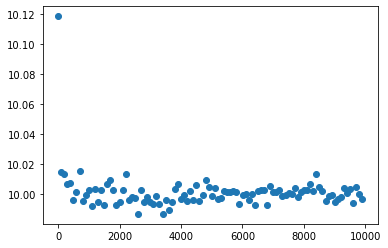

In [26]:
MSG = """
El estimador no presenta es menos volatil cuando incrementa el número de muestras
"""

samples = list(range(1, 10000, 100))
expected_values = list(map(lambda e: check_bias(
    partial(gen_normal_sample, 10), estimate_mean, N=e), samples))
plt.plot(samples, expected_values, 'o')

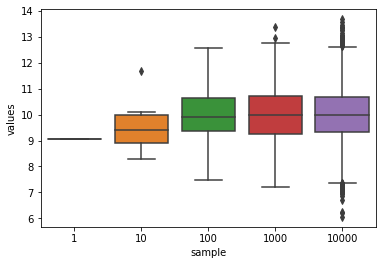

In [27]:
MSG = """
Hacer un box plot con la distribución de probabilidad de la muestra con estos tamanos:
1, 10, 100, 1000, 10000, 100000.

El resultado tiene sentido entre más puntos las distribución tiene menos
sesgo.
"""

df = compute_samples_table(gen_normal_sample, estimate_mean)
sns.boxplot(data=df, y="values", x="sample", showfliers=True)

### Normal distribution: Consistencia

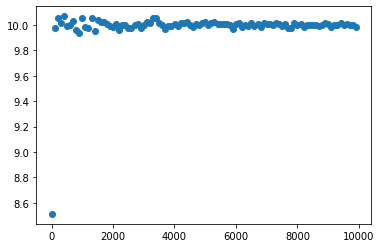

In [28]:
MSG = """
El estimado debería acercarcse a teta, pero no lo esta haciendo.

Algo estoy haciendo mal, el dice que el estimador tiene a theta en proababilidad,
que quiere decir?
"""

samples = list(range(1, 10000, 100))
expected_values = list(map(lambda e: 
                estimate_mean(gen_normal_sample(e)), samples))
plt.plot(samples, expected_values, 'o')

In [29]:
MSG = """
Hacer un box plot con la distribución de probabilidad del estimador, la idea es
generar k muestras de tamano n, graficar la distribución de estas k muestras,
entre más grande el número k menos varianza debería tener la distribución.

El estimador es consistente, aun con muestras pequenas la distribución
del estimador tiende hacia el parametro.
"""

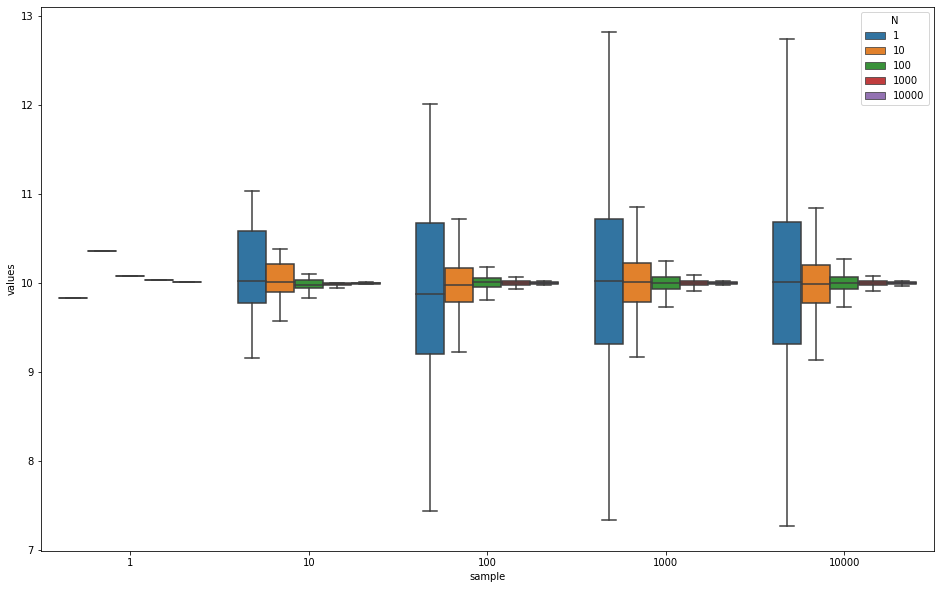

In [33]:
df_e = estimators_samples_table(gen_normal_sample, estimate_mean)
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(ax=ax, data=df_e, y="values", x="sample", hue="N", showfliers=False)

### Normal distribution: Error

In [34]:
MSG = """
Lo que yo esperaria es que el mean square error del parametro disminuya conforme incrementa el número de muestras.
No siempre es el menor sin embargo el valor es más constante entre más muestras, no cambia tanto entre ejecuciones.
"""

In [39]:
df_e = estimators_samples_table(gen_normal_sample, estimate_mean)
df_e.loc[:,"parameter"] = MU
df_e.loc[:,"square_error"] = (df_e["values"] - df_e["parameter"]).apply(lambda e: e**2)
df_e.head()

,values,sample,N,parameter,square_error
0,8.909919,1,1,10,1.188277
0,8.916959,10,1,10,1.172978
1,10.859788,10,1,10,0.739235
2,9.809256,10,1,10,0.036383
3,8.602642,10,1,10,1.952609


In [40]:
df_e[["sample", "square_error"]].groupby(by="sample").describe()

square_error                                                        \
              count      mean       std           min       25%       50%   
sample                                                                      
1               5.0  0.325363  0.512359  1.947724e-05  0.000027  0.030550   
10             50.0  0.165588  0.388845  1.284134e-07  0.000113  0.004812   
100           500.0  0.214806  0.710978  3.455999e-08  0.000136  0.003067   
1000         5000.0  0.221664  0.763292  6.065795e-11  0.000151  0.002869   
10000       50000.0  0.226460  0.754208  9.186925e-13  0.000158  0.002868   

                             
             75%        max  
sample                       
1       0.407940   1.188277  
10      0.049409   1.952609  
100     0.054052   8.064222  
1000    0.059207  13.218792  
10000   0.061709  16.867908

### Uniform distribution

In [41]:
LOW = 10
MAX = 1

def gen_uniform_sample(N, lower=LOW, upper=MAX):
    return np.random.uniform(lower, upper, 10)

### Exponential distribution

array([221.49720191, 865.09695731, 953.92439168, 840.8799717 ,
       615.94717838, 855.34745448, 406.83630633, 697.30127558,
       371.0176405 , 750.89002138])